In [1]:
#Aplicando o modelo de Firth’s Logistic Regression no Dataset de Variáveis Numéricas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
Data_Numerical = pd.read_csv('Dataset_Numerical.csv')

In [4]:
Data_Numerical

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Result Test COVID
0,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
1,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0
2,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0
3,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
4,9,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,19,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
597,19,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0
598,15,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0
599,17,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0


In [5]:
#Dividindo meu Dataset em Treinamento e Teste

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Data_Numerical.drop(['Result Test COVID'],axis=1), 
                                                    Data_Numerical['Result Test COVID'], test_size=0.30, 
                                                    random_state=101)

In [8]:
#Treinamento e Predição

In [9]:
def firth_logit(X,y,num_iter=5000,learning_rate=0.01):
    #Initialize weights
    weights = np.ones(X.shape[1])
    
    #Define get_predictions function
    def get_predictions(X,weights):
        z = np.dot(X,weights)
        y_pred =  1/(1 + np.exp(-z)) 
        return y_pred
    #Perform gradient descent
    for i in range(num_iter):
        
        y_pred = get_predictions(X,weights)
        
        #Calculate Fisher information matrix
        Xt = X.transpose()
        W = np.diag(y_pred*(1-y_pred))
        I = np.linalg.multi_dot([Xt,W,X])
        
        #Find diagonal of Hat Matrix
        sqrtW = W**0.5
        H = np.linalg.multi_dot([sqrtW,X,np.linalg.inv(I),Xt,sqrtW])
        hat_diag = np.diag(H)
        
        #Calculate U_star
        U_star = np.matmul((y -y_pred + hat_diag*(0.5 - y_pred)),X)
        
        #Update weights
        weights += np.matmul(np.linalg.inv(I),U_star)*learning_rate
    
    #Get final predictions
    y_pred =  get_predictions(X,weights)
    return y_pred,weights

In [10]:
#Chamando a função para me retornar os valores de Y previstos após alterar os pesos conforme o modelo foi treinado

Predictions,weights = firth_logit(X_train,y_train)


In [11]:
#Conseguindo o valor de Y com os pesos do treinamento do modelo e o X de Teste como entrada

def get_predictions(X,weights):
        z = np.dot(X,weights)
        y_pred =  1/(1 + np.exp(-z)) 
        return y_pred

y_test2 = get_predictions(X_test,weights)


In [12]:
#Resultado

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,np.round(y_test2)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       162
           1       0.26      0.26      0.26        19

    accuracy                           0.85       181
   macro avg       0.59      0.59      0.59       181
weighted avg       0.85      0.85      0.85       181



In [16]:
print(confusion_matrix(y_test,np.round(y_test2)))

[[148  14]
 [ 14   5]]


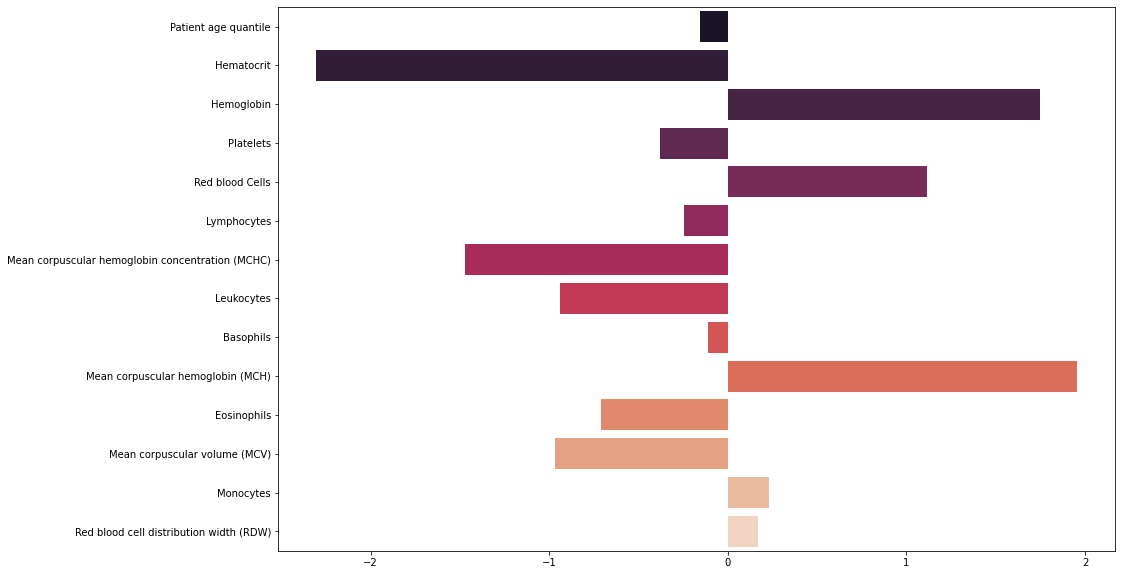

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(y=[str(list(Data_Numerical.columns.values)[y]) for y in range(len(weights))], x=weights, palette="rocket",orient="h")

In [15]:
# summarize feature importance
for i,v in enumerate(weights):
    print(str(list(Data_Numerical.columns.values)[i]) + ' Score: %.5f' % (v))

Patient age quantile Score: -0.15329
Hematocrit Score: -2.30512
Hemoglobin Score: 1.74979
Platelets Score: -0.38222
Red blood Cells Score: 1.11313
Lymphocytes Score: -0.24534
Mean corpuscular hemoglobin concentration (MCHC) Score: -1.46935
Leukocytes Score: -0.93720
Basophils Score: -0.10969
Mean corpuscular hemoglobin (MCH) Score: 1.95556
Eosinophils Score: -0.71253
Mean corpuscular volume (MCV) Score: -0.96635
Monocytes Score: 0.23034
Red blood cell distribution width (RDW) Score: 0.16693
